In [251]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('pokemon.csv')
df.head()

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5


In [252]:
def convert_type(typing):
    if typing.find('~') > 0:
        split = typing.split('~')
        return split[0], split[1]
    else:
        return typing, None
    
list1 = df['typing'].apply(convert_type).tolist()
types = pd.DataFrame(list1, columns=['type_1', 'type_2'])
df = df.join(types)

In [253]:
df.columns

Index(['name', 'pokedex_number', 'abilities', 'typing', 'hp', 'attack',
       'defense', 'special_attack', 'special_defense', 'speed', 'height',
       'weight', 'genus', 'gen_introduced', 'female_rate', 'genderless',
       'baby_pokemon', 'legendary', 'mythical', 'is_default',
       'forms_switchable', 'base_experience', 'capture_rate', 'egg_groups',
       'egg_cycles', 'base_happiness', 'can_evolve', 'evolves_from',
       'primary_color', 'shape', 'number_pokemon_with_typing',
       'normal_attack_effectiveness', 'fire_attack_effectiveness',
       'water_attack_effectiveness', 'electric_attack_effectiveness',
       'grass_attack_effectiveness', 'ice_attack_effectiveness',
       'fighting_attack_effectiveness', 'poison_attack_effectiveness',
       'ground_attack_effectiveness', 'fly_attack_effectiveness',
       'psychic_attack_effectiveness', 'bug_attack_effectiveness',
       'rock_attack_effectiveness', 'ghost_attack_effectiveness',
       'dragon_attack_effectiveness', '

In [254]:
dummies = pd.get_dummies(df['type_1'])

In [255]:
stats = df[['hp', 'attack',
       'defense', 'special_attack', 'special_defense', 'speed', 'height',
       'weight', 'gen_introduced', 'female_rate', 'base_experience', 'capture_rate',
       'egg_cycles', 'base_happiness', 'number_pokemon_with_typing']]
df_stats = stats.join(dummies)

In [256]:
effectiveness = df[['normal_attack_effectiveness', 'fire_attack_effectiveness',
       'water_attack_effectiveness', 'electric_attack_effectiveness',
       'grass_attack_effectiveness', 'ice_attack_effectiveness',
       'fighting_attack_effectiveness', 'poison_attack_effectiveness',
       'ground_attack_effectiveness', 'fly_attack_effectiveness',
       'psychic_attack_effectiveness', 'bug_attack_effectiveness',
       'rock_attack_effectiveness', 'ghost_attack_effectiveness',
       'dragon_attack_effectiveness', 'dark_attack_effectiveness',
       'steel_attack_effectiveness', 'fairy_attack_effectiveness']]


df_effects = effectiveness.join(dummies)

In [257]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(effectiveness, dummies, test_size=0.3)

In [258]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(18, input_shape=(18,), activation='relu'))
model.add(Dense(18, activation='softmax'))
model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/500
25/25 [==============================] - 0s 561us/step - loss: 3.3260 - accuracy: 0.0537
Epoch 2/500
25/25 [==============================] - 0s 560us/step - loss: 3.0489 - accuracy: 0.0665
Epoch 3/500
25/25 [==============================] - 0s 561us/step - loss: 2.8755 - accuracy: 0.1215
Epoch 4/500
25/25 [==============================] - 0s 561us/step - loss: 2.7269 - accuracy: 0.1829
Epoch 5/500
25/25 [==============================] - 0s 561us/step - loss: 2.5891 - accuracy: 0.2494
Epoch 6/500
25/25 [==============================] - 0s 520us/step - loss: 2.4734 - accuracy: 0.3120
Epoch 7/500
25/25 [==============================] - 0s 520us/step - loss: 2.3639 - accuracy: 0.3031
Epoch 8/500
25/25 [==============================] - 0s 560us/step - loss: 2.2529 - accuracy: 0.3235
Epoch 9/500
25/25 [==============================] - 0s 561us/step - loss: 2.1425 - accuracy: 0.3849
Epoch 10/500
25/25 [==============================] - 0s 560us/step - loss: 2.0232 - accura

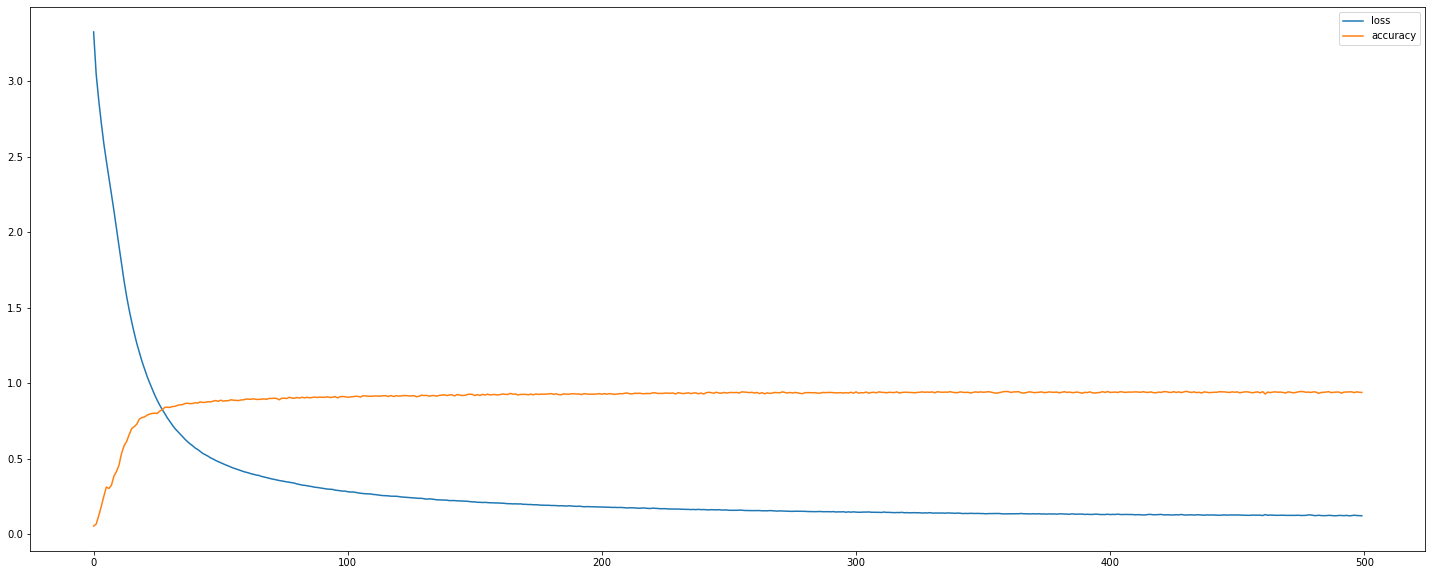

In [259]:
import time

# train with timing
start_time = time.time()
history = model.fit(X_train, y_train, epochs=500)
print("Process finished --- %s seconds ---" % (time.time() - start_time))
pd.DataFrame(history.history).plot(figsize=(25,10))
plt.show()
y_pred = model.predict(X_test)

In [260]:
print(y_test.shape)
results = model.evaluate(X_test, y_test)
results

(336, 18)
11/11 [==============================] - 0s 546us/step - loss: 0.3058 - accuracy: 0.8839


[0.3057573735713959, 0.8839285969734192]

In [261]:
def fix_type(t):
    return dummies.columns.get_loc(t)

In [262]:
# plt.figure(figsize = (28,10))
# sns.heatmap(data=df_effects.corr(), annot=True)

In [263]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
dt.score(X_test,y_test)

0.8630952380952381

In [264]:
from sklearn.metrics import confusion_matrix, classification_report
import sys
predict = model.predict(X_test)
predict = np.argmax(predict, axis=1)
actual = y_test.idxmax(axis=1).apply(fix_type)

np.set_printoptions(threshold=sys.maxsize)
print(np.array(confusion_matrix(actual, predict)))

[[23  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  1  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0  0  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  2  0  0  0  0  0  1]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0 12  0  0  0  0  0  0  1  0  1  0  0  0]
 [ 0  1  0  0  0  0 15  0  0  0  2  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  1  0 11  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  2  0 12  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  1  0 36  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [ 0  0  1  0  0  0  1  0  0  1  0  0  1  0 21  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2 13  0]
 [ 2  0  0  0  0  0  0  0  0  0

In [265]:
predict = dt.predict(X_test)
predict = np.argmax(predict, axis=1)
actual = y_test.idxmax(axis=1).apply(fix_type)

np.set_printoptions(threshold=sys.maxsize)
print(np.array(confusion_matrix(actual, predict)))

[[23  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 2 11  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 1  0  0  0  0 12  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 2  1  0  1  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  1  0 11  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0]
 [ 4  0  1  0  0  0  0  0  0  0  9  0  0  0  0  3  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  1]
 [ 0  0  0  1  0  0  0  0  0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [ 1  0  1  0  0  0  1  0  0  0  0  0  1  0 21  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2 13  0]
 [ 2  0  0  0  0  0  0  0  0  0